In [7]:
import pandas as pd
df = pd.read_csv('Wahl-O-Mat Bundestagswahl 2025_Datensatz_v1.02.csv')

mapping = {'stimme zu': 1, 'stimme nicht zu': -1}
df['Position'] = df['Position: Position'].astype(str).str.strip().str.lower().map(mapping).fillna(0).astype(int)


df = df[["Partei: Kurzbezeichnung", "Position", "These: Titel", "These: These"]]
print(df.head())

  Partei: Kurzbezeichnung  Position               These: Titel  \
0                     SPD         1  Unterstützung der Ukraine   
1               CDU / CSU         1  Unterstützung der Ukraine   
2                   GRÜNE         1  Unterstützung der Ukraine   
3                     FDP         1  Unterstützung der Ukraine   
4                     AfD        -1  Unterstützung der Ukraine   

                                        These: These  
0  Deutschland soll die Ukraine weiterhin militär...  
1  Deutschland soll die Ukraine weiterhin militär...  
2  Deutschland soll die Ukraine weiterhin militär...  
3  Deutschland soll die Ukraine weiterhin militär...  
4  Deutschland soll die Ukraine weiterhin militär...  


In [27]:
# pivot to get one vector per thesis (rows = thesis title, cols = parties)
thesis_matrix = df.pivot_table(
    columns='These: Titel',
    index='Partei: Kurzbezeichnung',
    values='Position',
    aggfunc='first'
).fillna(0)
thesis_matrix

These: Titel,35-Stunden-Woche,Abschaffung der Frauenquote,Abschaffung von Zöllen,Abweisung Asylsuchender,Anhebung des Spitzensteuersatzes,Anwerbung von Fachkräften,Arbeitserlaubnis für Asylsuchende,Automatisierte Gesichtserkennung,Begrenzung der Mietpreise,Ehrenamt,...,Soziales Pflichtjahr,Strafrecht für unter 14-Jährige,Streichung des Bürgergelds,Tempolimit auf Autobahnen,Umlegung der Grundsteuer,Unterstützung der Ukraine,Verwerfen der Klimaziele,Volksentscheide,Zweite Staatsbürgerschaft,Ökologische Landwirtschaft
Partei: Kurzbezeichnung,,,,,,,,,,,,,,,,,,,,,
AfD,-1,1,1,1,-1,0,-1,1,-1,-1,...,0,1,1,-1,0,-1,1,1,-1,-1
BP,-1,1,-1,1,-1,-1,1,-1,-1,1,...,-1,1,1,-1,0,0,1,-1,-1,-1
BSW,0,-1,1,1,1,0,-1,0,1,0,...,1,-1,1,-1,-1,-1,-1,1,1,0
BÜNDNIS DEUTSCHLAND,-1,1,-1,1,-1,1,1,0,-1,-1,...,-1,1,1,-1,1,0,1,1,-1,1
BüSo,1,1,1,1,1,1,1,-1,1,1,...,1,-1,-1,-1,1,-1,1,1,1,-1
Bündnis C,-1,1,-1,1,-1,-1,1,-1,-1,1,...,1,1,1,0,1,0,1,1,-1,1
CDU / CSU,-1,-1,0,1,-1,1,-1,1,1,-1,...,1,1,1,-1,1,1,-1,-1,-1,-1
Die Gerechtigkeitspartei - Team Todenhöfer,-1,1,1,-1,1,1,1,-1,1,1,...,-1,-1,1,0,-1,-1,-1,1,1,1
Die Linke,1,-1,1,-1,1,0,1,-1,1,0,...,-1,-1,-1,1,-1,-1,-1,1,1,1


In [ ]:

# perform PCA on thesis vectors
pca = PCA(n_components=3)
thesis_pca = pca.fit_transform(thesis_matrix.values)

# results as DataFrame for easy inspection
thesis_pca_df = pd.DataFrame(thesis_pca, index=thesis_matrix.index, columns=['PC1', 'PC2', 'PC3'])

print("Explained variance ratios:", pca.explained_variance_ratio_)
thesis_pca_df.head()

In [28]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(thesis_matrix.values)

In [29]:
len(X_reduced)

28

In [30]:
thesis_pca_df = pd.DataFrame(X_reduced, index=thesis_matrix.index, columns=['PC1', 'PC2', 'PC3'])

In [31]:
thesis_pca_df

,PC1,PC2,PC3
Partei: Kurzbezeichnung,,,
AfD,-6.157836,-1.219647,1.594267
BP,-5.154326,0.300517,-0.334823
BSW,0.671419,-1.445826,1.848860
BÜNDNIS DEUTSCHLAND,-5.899778,0.546929,-0.165560
BüSo,-2.764588,-2.947809,-0.392604
Bündnis C,-5.303094,-1.082405,-2.416388
CDU / CSU,-4.387726,2.905695,-0.226389
Die Gerechtigkeitspartei - Team Todenhöfer,1.081169,-1.377888,1.186652
Die Linke,4.223030,-0.789151,0.719128


/tmp/ipykernel_661151/2724659645.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annotate(txt, (thesis_pca_df['PC1'][i], thesis_pca_df['PC2'][i]))


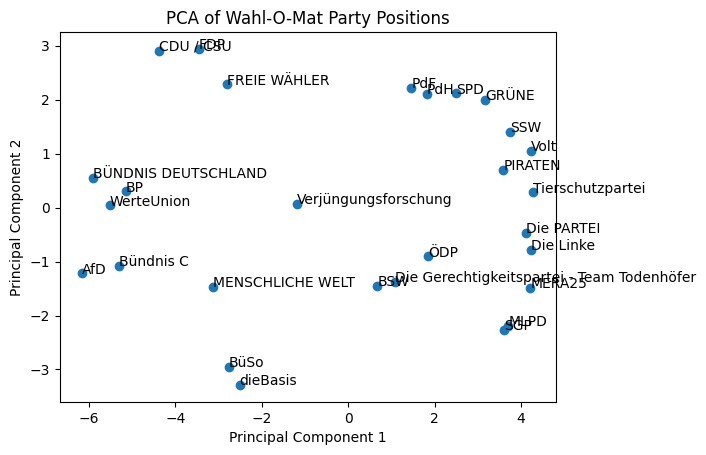

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import annotate
plt.plot(thesis_pca_df['PC1'], thesis_pca_df['PC2'], 'o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wahl-O-Mat Party Positions')
for i, txt in enumerate(thesis_pca_df.index):
    annotate(txt, (thesis_pca_df['PC1'][i], thesis_pca_df['PC2'][i]))
plt.savefig('wahlomat_pca.png')

In [41]:
# fit PCA to get component loadings (no import needed; PCA class and thesis_matrix exist)
pca = PCA(n_components=3)
pca.fit(thesis_matrix.values)

# loadings: rows = thesis (features), cols = principal components
loadings = pd.DataFrame(
    pca.components_.T,
    index=thesis_matrix.columns,
    columns=['PC1', 'PC2', 'PC3']
)

def show_top_loadings(loadings_df, pc='PC1', top_n=10, display_full=False):
    """
    Show top loadings for a given principal component.
    Returns the full loadings table ordered by absolute weight (with attached thesis text).
    """
    title_to_text_map = df.drop_duplicates('These: Titel').set_index('These: Titel')['These: These'].to_dict()
    pc_sorted = loadings_df[pc].abs().sort_values(ascending=False)
    top_df = loadings_df.reindex(pc_sorted.index).loc[:, [pc]].copy()
    top_df['abs_' + pc] = top_df[pc].abs()
    top_df['These: These'] = [title_to_text_map.get(t, "") for t in top_df.index]

    print(f"Top {top_n} loadings for {pc} (by absolute value):")
    display(top_df.head(top_n))

    if display_full:
        print(f"\nFull {pc} loadings ordered by absolute weight:")
        display(top_df)

    return top_df

# apply the function to PC1 and PC2
top_pc1 = show_top_loadings(loadings , pc='PC1', top_n=5, display_full=False)
top_pc2 = show_top_loadings(loadings, pc='PC2', top_n=5, display_full=False)
top_pc2 = show_top_loadings(loadings, pc='PC3', top_n=5, display_full=False)

Top 5 loadings for PC1 (by absolute value):


,PC1,abs_PC1,These: These
These: Titel,,,
Kontrolle von Zulieferern,0.235473,0.235473,Unternehmen sollen weiterhin die Einhaltung de...
Abweisung Asylsuchender,-0.227996,0.227996,"Asylsuchende, die über einen anderen EU-Staat ..."
Anhebung des Spitzensteuersatzes,0.223067,0.223067,Bei der Besteuerung von Einkommen soll der Spi...
Nutzung der Kernenergie,-0.219941,0.219941,Für die Stromerzeugung soll Deutschland wieder...
Schwangerschaftsabbruch nach Beratung,-0.219811,0.219811,Schwangerschaftsabbrüche sollen in den ersten ...


Top 5 loadings for PC2 (by absolute value):


,PC2,abs_PC2,These: These
These: Titel,,,
Unterstützung der Ukraine,0.435161,0.435161,Deutschland soll die Ukraine weiterhin militär...
Rüstungsexporte nach Israel,0.342133,0.342133,Aus Deutschland sollen weiterhin Rüstungsgüter...
Volksentscheide,-0.302705,0.302705,In Deutschland soll es auf Bundesebene Volksen...
Anwerbung von Fachkräften,0.282072,0.282072,Deutschland soll weiterhin die Anwerbung von F...
35-Stunden-Woche,-0.214254,0.214254,In Deutschland soll die 35-Stunden-Woche als g...


Top 5 loadings for PC3 (by absolute value):


,PC3,abs_PC3,These: These
These: Titel,,,
Abschaffung von Zöllen,0.462949,0.462949,Deutschland soll sich für die Abschaffung der ...
Soziales Pflichtjahr,-0.304092,0.304092,Für junge Erwachsene soll ein soziales Pflicht...
Strafrecht für unter 14-Jährige,-0.290153,0.290153,Unter 14-Jährige sollen strafrechtlich belangt...
Energieintensive Unternehmen,-0.283375,0.283375,Energieintensive Unternehmen sollen vom Staat ...
Ökologische Landwirtschaft,-0.266216,0.266216,Ökologische Landwirtschaft soll stärker geförd...
